# **"Hybrid Approach for Credit Risk Assessment: Combining Deep Learning and Machine Learning Techniques for Credit Card Assessments**





# **Data load and read **

In [ ]:
import pandas as pd
# Load the data from CSV file
data = pd.read_csv('Training_dataset_Original.csv')
data

<ipython-input-1-033f65cc3934>:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/credit_card_risk/dataset/Training_dataset_Original.csv')


,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,230032,1696,1.6541,0.000,0.000,0.000,0,6015,322,40369,...,1,73.78,82.547,0.08696,10,0.63899,na,0,C,0
1,230033,1846,0.8095,0.000,0.000,0.000,102,7532,3171,18234,...,0,99.129,missing,0,13,0.63836,na,na,L,1
2,230034,1745,0.4001,0.000,0.000,0.000,missing,2536,missing,missing,...,0,missing,29.29,0,1,1.00000,na,0,C,1
3,230035,1739,0.2193,0.000,0.000,0.000,1982,26440,4955,20316,...,0,96.272,missing,0.15385,3,0.53241,0,0,L,0
4,230036,1787,0.0118,0.225,0.000,0.000,5451,5494,5494,7987,...,0,115.019,missing,0,1,0.92665,na,na,L,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,310027,1736,2.1740,0.000,0.000,0.000,11,4248,1577,13379,...,0,missing,78.378,0,4,0.43829,na,0,C,0
79996,310028,1724,0.0000,1.108,0.768,0.000,missing,64041,missing,10926,...,0,missing,38.325,0.16667,14,0.57931,0,0,C,0
79997,310029,1605,0.2901,11.561,0.937,2.976,missing,2277,missing,3964,...,2,101.85,93.142,0.5,4,0.42069,na,0,C,1
79998,310030,1780,1.1874,0.000,0.000,0.000,0,6356,4802,3206,...,0,missing,77.022,0.06061,9,0.53251,na,0,L,0


# **Data analysis**

In [ ]:
# Display basic information about the dataset
print(data.info())

# Display the first few rows of the dataset
print(data.head())

# Summary statistics of numerical columns
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   application_key  80000 non-null  int64  
 1   mvar1            80000 non-null  object 
 2   mvar2            74447 non-null  float64
 3   mvar3            79499 non-null  float64
 4   mvar4            79499 non-null  float64
 5   mvar5            79499 non-null  float64
 6   mvar6            80000 non-null  object 
 7   mvar7            80000 non-null  object 
 8   mvar8            80000 non-null  object 
 9   mvar9            80000 non-null  object 
 10  mvar10           80000 non-null  object 
 11  mvar11           80000 non-null  object 
 12  mvar12           80000 non-null  object 
 13  mvar13           80000 non-null  object 
 14  mvar14           80000 non-null  int64  
 15  mvar15           80000 non-null  object 
 16  mvar16           80000 non-null  object 
 17  mvar17      

# **Data vissualization**

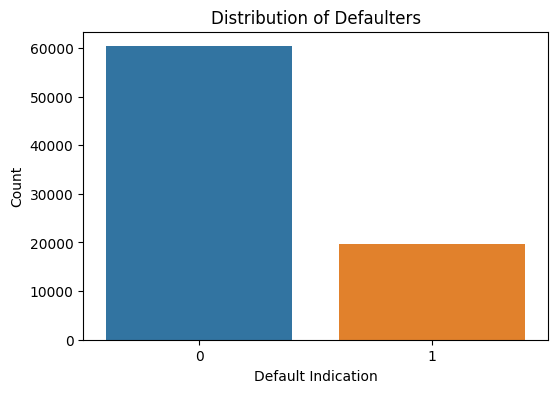

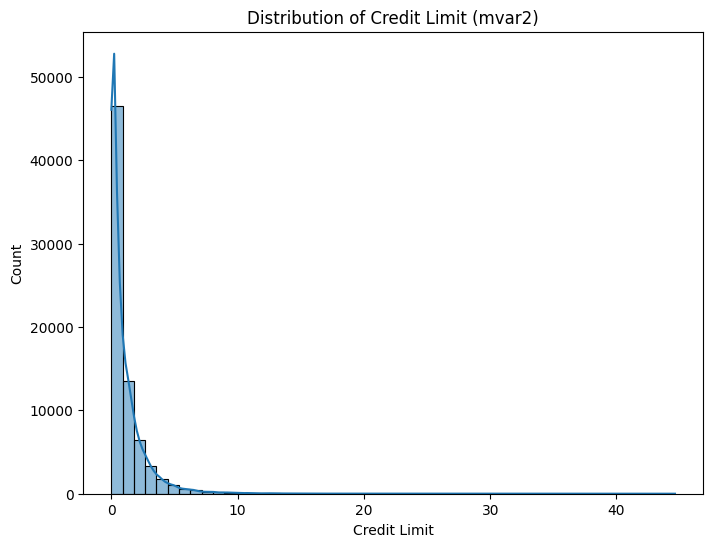

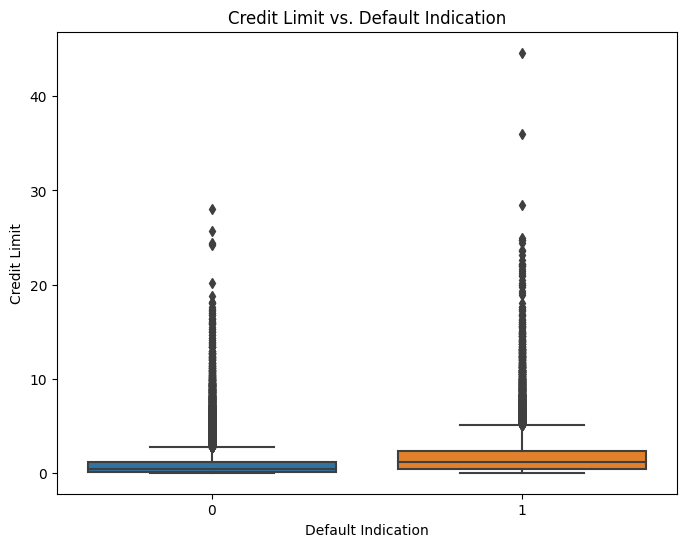

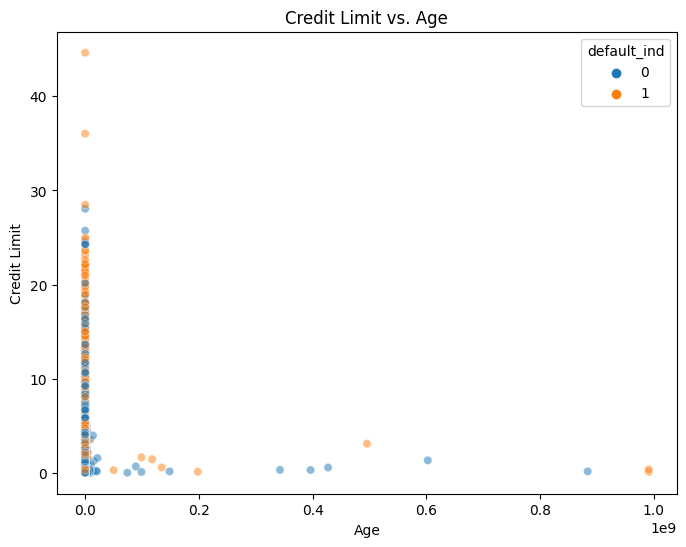

<ipython-input-3-7df9dde50a00>:38: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


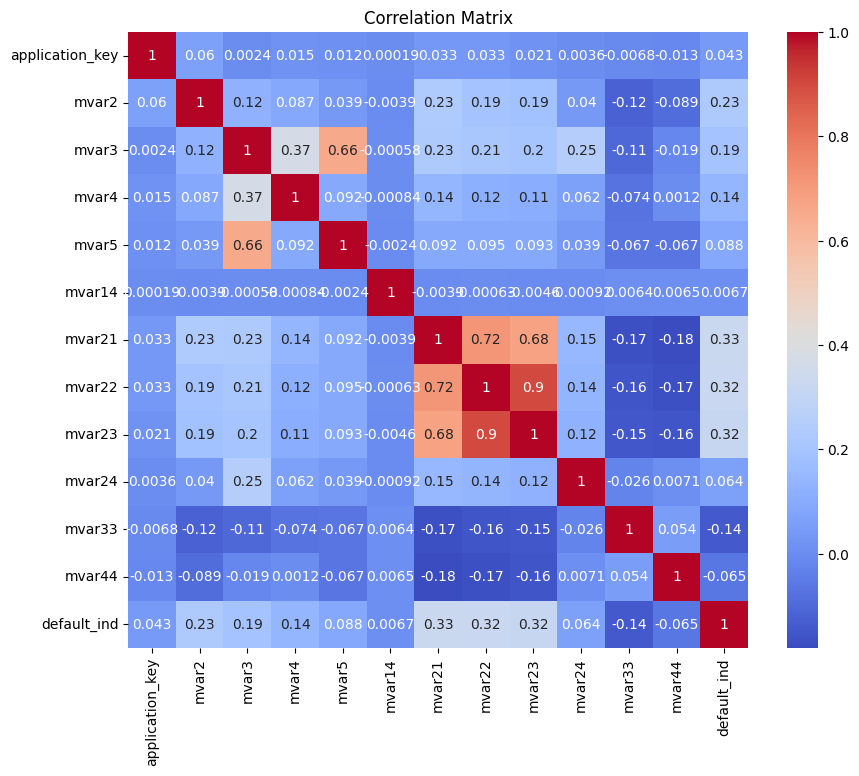

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Distribution of Defaulters
plt.figure(figsize=(6, 4))
sns.countplot(x='default_ind', data=data)
plt.title('Distribution of Defaulters')
plt.xlabel('Default Indication')
plt.ylabel('Count')
plt.show()

# Visualization 2: Distribution of Credit Limit (mvar2)
plt.figure(figsize=(8, 6))
sns.histplot(data['mvar2'].dropna(), bins=50, kde=True)
plt.title('Distribution of Credit Limit (mvar2)')
plt.xlabel('Credit Limit')
plt.ylabel('Count')
plt.show()

# Visualization 3: Credit Limit vs. Default Indication
plt.figure(figsize=(8, 6))
sns.boxplot(x='default_ind', y='mvar2', data=data)
plt.title('Credit Limit vs. Default Indication')
plt.xlabel('Default Indication')
plt.ylabel('Credit Limit')
plt.show()

# Visualization 4: Relationship between Credit Limit (mvar2) and Age (mvar14)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mvar14', y='mvar2', data=data, hue='default_ind', alpha=0.5)
plt.title('Credit Limit vs. Age')
plt.xlabel('Age')
plt.ylabel('Credit Limit')
plt.show()

# Visualization 5: Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
pip install missingno

<Figure size 1000x600 with 0 Axes>

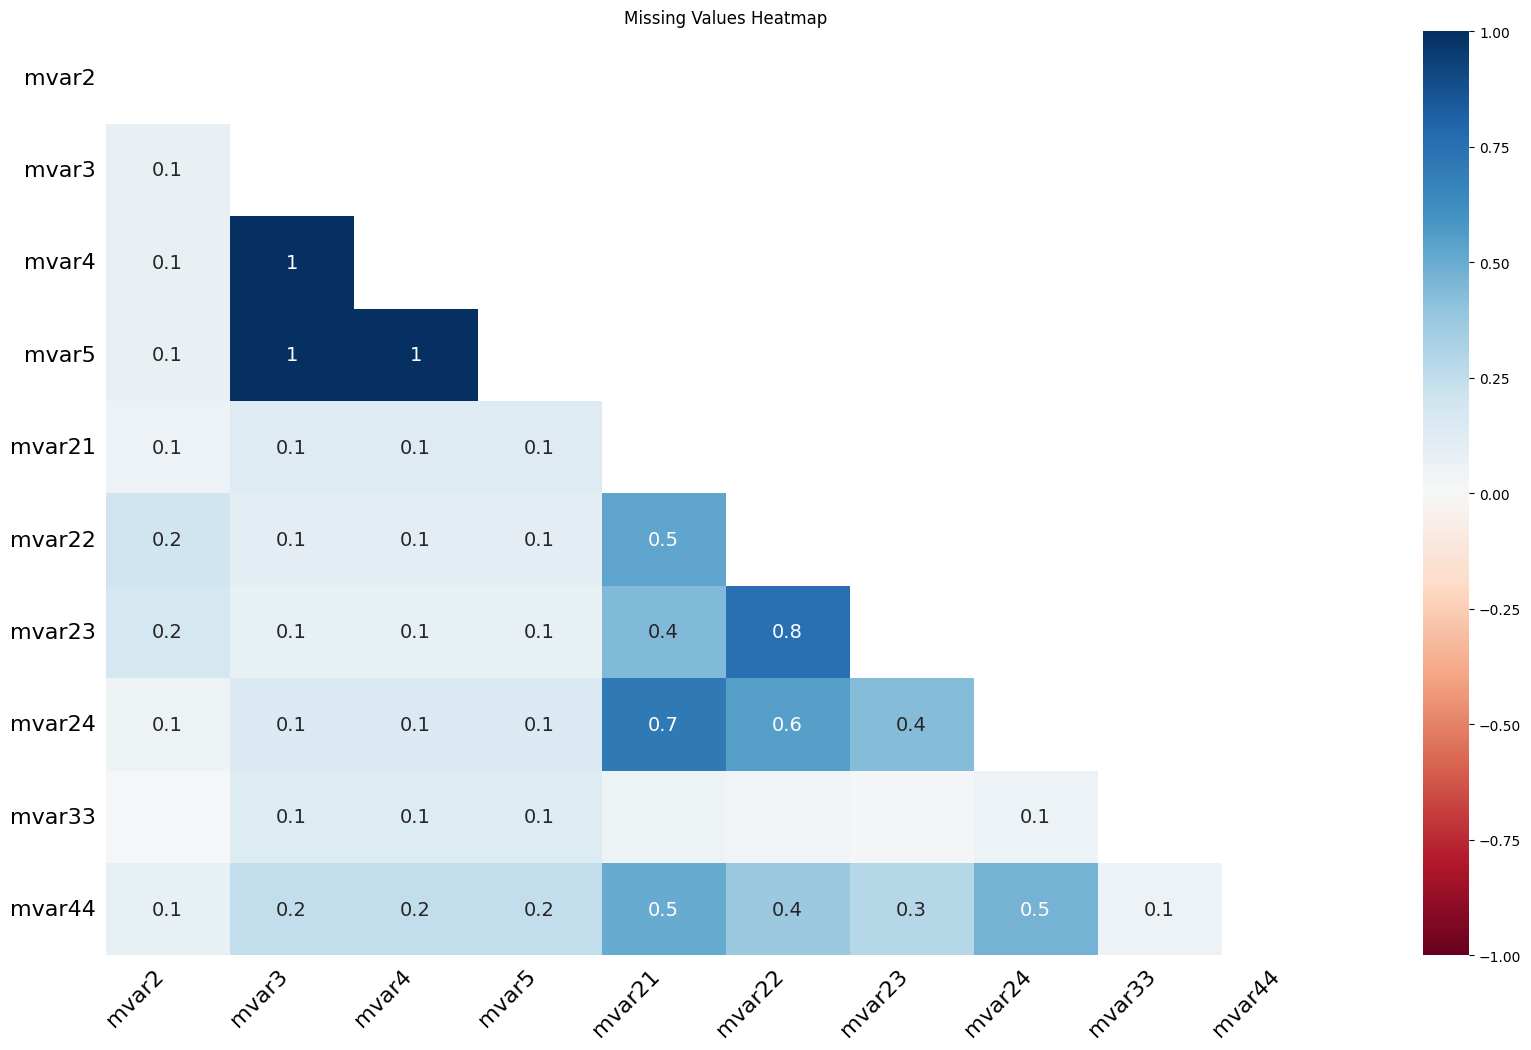

/usr/local/lib/python3.10/dist-packages/missingno/missingno.py:271: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)


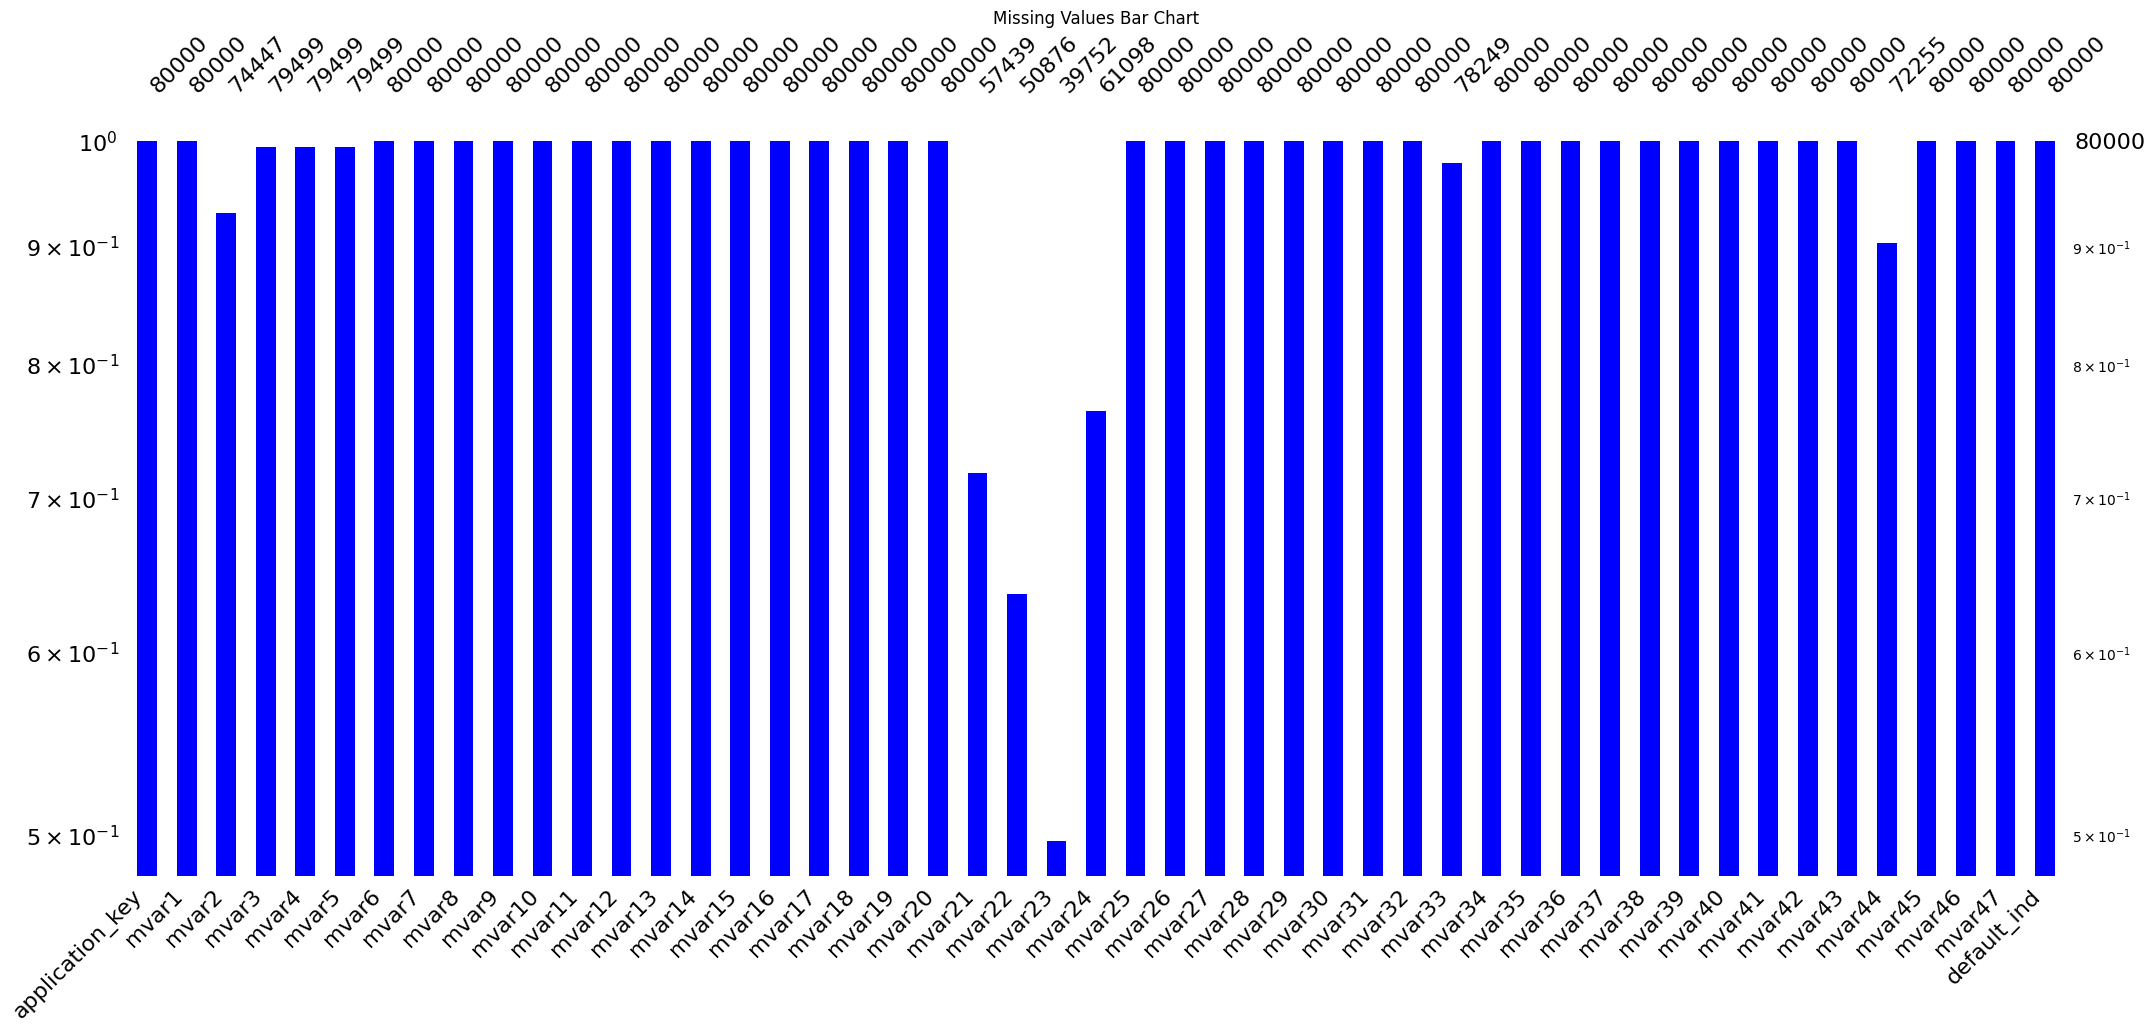

In [ ]:
import missingno as msno

# Plot the missing values using a heatmap
plt.figure(figsize=(10, 6))
msno.heatmap(data)
plt.title('Missing Values Heatmap')
plt.show()

# You can also plot the missing values as a bar chart
plt.figure(figsize=(10, 6))
msno.bar(data, color='blue', log=True)
plt.title('Missing Values Bar Chart')
plt.show()


# **Missing values analysis**

In [ ]:
import pandas as pd



# Get the count of missing values in each column
missing_values_count = data.isnull().sum()

# Get the percentage of missing values in each column
missing_values_percentage = (data.isnull().sum() / len(data)) * 100

# Create a DataFrame to store the missing values description
missing_values_description = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage
})

# Sort the DataFrame in descending order based on the missing values count
missing_values_description.sort_values(by='Missing Values Count', ascending=False, inplace=True)

# Display the missing values description
print(missing_values_description)

# Get the column names with missing values
columns_with_missing_values = missing_values_description.index[missing_values_description['Missing Values Count'] > 0].tolist()

# Display the column names with missing values
print("Columns with Missing Values:")
print(columns_with_missing_values)


                 Missing Values Count  Missing Values Percentage
mvar23                          40248                   50.31000
mvar22                          29124                   36.40500
mvar21                          22561                   28.20125
mvar24                          18902                   23.62750
mvar44                           7745                    9.68125
mvar2                            5553                    6.94125
mvar33                           1751                    2.18875
mvar3                             501                    0.62625
mvar4                             501                    0.62625
mvar5                             501                    0.62625
mvar36                              0                    0.00000
mvar30                              0                    0.00000
mvar31                              0                    0.00000
mvar32                              0                    0.00000
mvar34                   

In [ ]:
data

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,230032,1696,1.6541,0.000,0.000,0.000,0,6015,322,40369,...,1,73.78,82.547,0.08696,10,0.63899,na,0,C,0
1,230033,1846,0.8095,0.000,0.000,0.000,102,7532,3171,18234,...,0,99.129,missing,0,13,0.63836,na,na,L,1
2,230034,1745,0.4001,0.000,0.000,0.000,missing,2536,missing,missing,...,0,missing,29.29,0,1,1.00000,na,0,C,1
3,230035,1739,0.2193,0.000,0.000,0.000,1982,26440,4955,20316,...,0,96.272,missing,0.15385,3,0.53241,0,0,L,0
4,230036,1787,0.0118,0.225,0.000,0.000,5451,5494,5494,7987,...,0,115.019,missing,0,1,0.92665,na,na,L,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,310027,1736,2.1740,0.000,0.000,0.000,11,4248,1577,13379,...,0,missing,78.378,0,4,0.43829,na,0,C,0
79996,310028,1724,0.0000,1.108,0.768,0.000,missing,64041,missing,10926,...,0,missing,38.325,0.16667,14,0.57931,0,0,C,0
79997,310029,1605,0.2901,11.561,0.937,2.976,missing,2277,missing,3964,...,2,101.85,93.142,0.5,4,0.42069,na,0,C,1
79998,310030,1780,1.1874,0.000,0.000,0.000,0,6356,4802,3206,...,0,missing,77.022,0.06061,9,0.53251,na,0,L,0


In [ ]:
import pandas as pd
import numpy as np


# Convert "missing" to NaN
data = data.replace('missing', np.nan)

# Convert specific columns to numeric and handle 'na' values
numeric_columns_with_na = ['mvar6', 'mvar7', 'mvar8', 'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13', 'mvar14', 'mvar15', 'mvar16',
                           'mvar17', 'mvar18', 'mvar19', 'mvar20', 'mvar25', 'mvar26', 'mvar27', 'mvar28', 'mvar29', 'mvar30',
                           'mvar31', 'mvar32', 'mvar34', 'mvar35', 'mvar36', 'mvar37', 'mvar38', 'mvar39', 'mvar40', 'mvar41',
                           'mvar42', 'mvar43', 'mvar45', 'mvar46', 'mvar47']
for col in numeric_columns_with_na:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Convert mvar1 to numeric and handle 'missing' values
data['mvar1'] = pd.to_numeric(data['mvar1'], errors='coerce')

# Convert mvar21 to numeric and handle 'missing' values
data['mvar21'] = pd.to_numeric(data['mvar21'], errors='coerce')

# Convert mvar22 to numeric and handle 'missing' values
data['mvar22'] = pd.to_numeric(data['mvar22'], errors='coerce')

# Convert mvar23 to numeric and handle 'missing' values
data['mvar23'] = pd.to_numeric(data['mvar23'], errors='coerce')

# Convert mvar24 to numeric and handle 'missing' values
data['mvar24'] = pd.to_numeric(data['mvar24'], errors='coerce')

# Convert mvar33 to numeric and handle 'na' values
data['mvar33'] = pd.to_numeric(data['mvar33'], errors='coerce')

# Convert mvar44 to numeric and handle 'na' values
data['mvar44'] = pd.to_numeric(data['mvar44'], errors='coerce')

# Impute missing values with mean for numerical columns
numerical_columns = ['mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar21', 'mvar22', 'mvar23', 'mvar24', 'mvar33', 'mvar44']
for col in numerical_columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Impute missing values with mode for categorical columns
categorical_columns = ['mvar6', 'mvar7', 'mvar8', 'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13', 'mvar14', 'mvar15', 'mvar16',
                       'mvar17', 'mvar18', 'mvar19', 'mvar20', 'mvar25', 'mvar26', 'mvar27', 'mvar28', 'mvar29', 'mvar30',
                       'mvar31', 'mvar32', 'mvar34', 'mvar35', 'mvar36', 'mvar37', 'mvar38', 'mvar39', 'mvar40', 'mvar41',
                       'mvar42', 'mvar43', 'mvar45', 'mvar46', 'mvar47']
for col in categorical_columns:
    mode_array = data[col].mode()
    if not mode_array.empty:
        data[col].fillna(mode_array.values[0], inplace=True)

# Now, the data should be ready for further analysis and modeling.


In [ ]:
data

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,230032,1696.0,1.6541,0.000,0.000,0.000,0.0,6015.0,322.0,40369.0,...,1.0,73.780,82.547,0.08696,10.0,0.63899,0.0,0.0,NaN,0
1,230033,1846.0,0.8095,0.000,0.000,0.000,102.0,7532.0,3171.0,18234.0,...,0.0,99.129,100.000,0.00000,13.0,0.63836,0.0,0.0,NaN,1
2,230034,1745.0,0.4001,0.000,0.000,0.000,0.0,2536.0,0.0,297.0,...,0.0,100.000,29.290,0.00000,1.0,1.00000,0.0,0.0,NaN,1
3,230035,1739.0,0.2193,0.000,0.000,0.000,1982.0,26440.0,4955.0,20316.0,...,0.0,96.272,100.000,0.15385,3.0,0.53241,0.0,0.0,NaN,0
4,230036,1787.0,0.0118,0.225,0.000,0.000,5451.0,5494.0,5494.0,7987.0,...,0.0,115.019,100.000,0.00000,1.0,0.92665,0.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,310027,1736.0,2.1740,0.000,0.000,0.000,11.0,4248.0,1577.0,13379.0,...,0.0,100.000,78.378,0.00000,4.0,0.43829,0.0,0.0,NaN,0
79996,310028,1724.0,0.0000,1.108,0.768,0.000,0.0,64041.0,0.0,10926.0,...,0.0,100.000,38.325,0.16667,14.0,0.57931,0.0,0.0,NaN,0
79997,310029,1605.0,0.2901,11.561,0.937,2.976,0.0,2277.0,0.0,3964.0,...,2.0,101.850,93.142,0.50000,4.0,0.42069,0.0,0.0,NaN,1
79998,310030,1780.0,1.1874,0.000,0.000,0.000,0.0,6356.0,4802.0,3206.0,...,0.0,100.000,77.022,0.06061,9.0,0.53251,0.0,0.0,NaN,0


In [ ]:
# Drop the column with 100% missing values (mvar47)
data.drop('mvar47', axis=1, inplace=True)


In [ ]:
data.drop('application_key', axis=1, inplace=True)

In [ ]:
# Check for missing values after imputation
missing_values_count = data.isnull().sum()
missing_values_percentage = (missing_values_count / len(data)) * 100

missing_values_df = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage
}).sort_values(by='Missing Values Percentage', ascending=False)

print(missing_values_df)


             Missing Values Count  Missing Values Percentage
mvar1                           0                        0.0
mvar36                          0                        0.0
mvar27                          0                        0.0
mvar28                          0                        0.0
mvar29                          0                        0.0
mvar30                          0                        0.0
mvar31                          0                        0.0
mvar32                          0                        0.0
mvar33                          0                        0.0
mvar34                          0                        0.0
mvar35                          0                        0.0
mvar37                          0                        0.0
mvar25                          0                        0.0
mvar38                          0                        0.0
mvar39                          0                        0.0
mvar40                  

# **Class Balanced**

In [ ]:
import pandas as pd

# Assuming you have already loaded your data into a DataFrame called 'data'
# and the target class column is named 'target_column_name'

# Count the occurrences of each class in the target column
class_counts = data['default_ind'].value_counts()

# Get the number of instances in each class
num_instances_class_0 = class_counts[0]
num_instances_class_1 = class_counts[1]

# Calculate the class imbalance ratio
imbalance_ratio = num_instances_class_1 / num_instances_class_0

# Print the class counts and imbalance ratio
print("Class 0 count:", num_instances_class_0)
print("Class 1 count:", num_instances_class_1)
print("Class Imbalance Ratio:", imbalance_ratio)


Class 0 count: 60303
Class 1 count: 19697
Class Imbalance Ratio: 0.3266338324793128


In [ ]:
pip install imbalanced-learn


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming you have already loaded your data into a DataFrame called 'data'
# and the target class column is named 'target_column_name'

# Separate features and target variable
X = data.drop(columns=['default_ind'])
y = data['default_ind']

# Create a SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create a new DataFrame with the balanced data
balanced_data = pd.DataFrame(X_balanced, columns=X.columns)
balanced_data['default_ind'] = y_balanced

# Check the class balance in the balanced dataset
class_counts = balanced_data['default_ind'].value_counts()
imbalance_ratio = class_counts[1] / class_counts[0]

print("Class 0 count:", class_counts[0])
print("Class 1 count:", class_counts[1])
print("Class Imbalance Ratio:", imbalance_ratio)


Class 0 count: 60303
Class 1 count: 60303
Class Imbalance Ratio: 1.0


# **ensemble learning VotingClassifier**

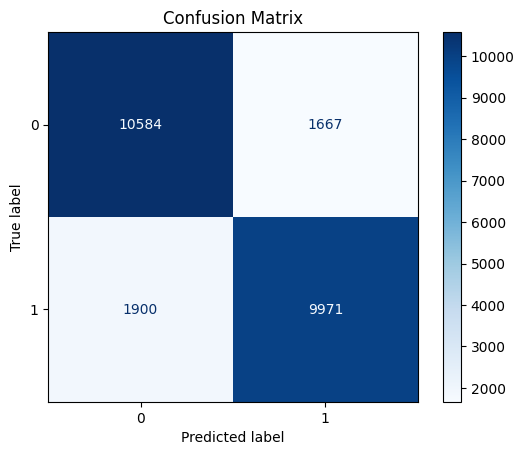

Confusion Matrix:
 [[10584  1667]
 [ 1900  9971]]
Accuracy: 0.8521266893292431
Precision: 0.856762330297302
Recall: 0.8399460871030242
F1-score: 0.8482708749840487


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X_balanced = balanced_data.drop(columns=['default_ind'])
y_balanced = balanced_data['default_ind']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Example classifiers: RandomForestClassifier, GradientBoostingClassifier, etc.
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

clf1 = RandomForestClassifier(random_state=42)
clf2 = GradientBoostingClassifier(random_state=42)

# Create a VotingClassifier with soft voting
voting_clf = VotingClassifier(estimators=[('rf', clf1), ('gb', clf2)], voting='soft')

# Train the VotingClassifier on the training data
voting_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = voting_clf.predict(X_test)

# Evaluate using confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Print textual confusion matrix
print("Confusion Matrix:\n", cm)

# Calculate accuracy, precision, recall, and F1-score
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

# **LSTM model**

Epoch 1/10
2413/2413 [==============================] - 81s 33ms/step - loss: 1.2860 - accuracy: 0.5683 - val_loss: 0.8130 - val_accuracy: 0.5946
Epoch 2/10
2413/2413 [==============================] - 70s 29ms/step - loss: 0.7143 - accuracy: 0.5720 - val_loss: 0.6755 - val_accuracy: 0.6005
Epoch 3/10
2413/2413 [==============================] - 74s 30ms/step - loss: 1.1250 - accuracy: 0.5771 - val_loss: 0.6870 - val_accuracy: 0.5769
Epoch 4/10
2413/2413 [==============================] - 75s 31ms/step - loss: 0.6977 - accuracy: 0.5935 - val_loss: 0.6299 - val_accuracy: 0.6846
Epoch 5/10
2413/2413 [==============================] - 70s 29ms/step - loss: 0.5616 - accuracy: 0.7198 - val_loss: 0.5310 - val_accuracy: 0.7461
Epoch 6/10
2413/2413 [==============================] - 72s 30ms/step - loss: 0.5240 - accuracy: 0.7451 - val_loss: 0.5034 - val_accuracy: 0.7547
Epoch 7/10
2413/2413 [==============================] - 75s 31ms/step - loss: 0.5150 - accuracy: 0.7495 - val_loss: 0.4934 -

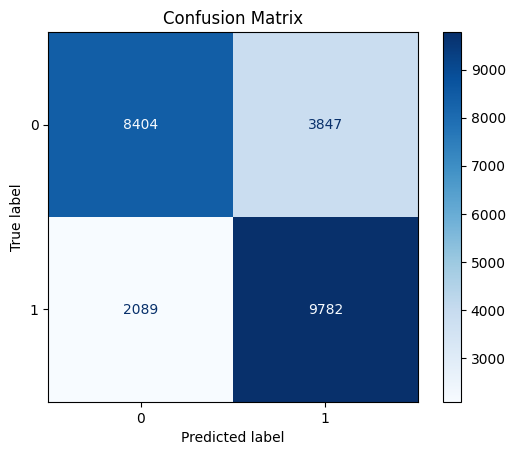

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have the balanced_data DataFrame from your previous code
# Separate features and target variable
X_balanced = balanced_data.drop(columns=['default_ind'])
y_balanced = balanced_data['default_ind']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data for LSTM (assuming each sample is a sequence of features)
sequence_length = X_train.shape[1]  # Adjust this based on your data
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], sequence_length, 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], sequence_length, 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(sequence_length, 1), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the test data
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluate using confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


# **Hybrid Model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

# Assuming you have already loaded the balanced data into a DataFrame called 'balanced_data'
# and the target class column is named 'target_column_name'

# Step 1: Assign X and y values
X = balanced_data.drop(columns=['default_ind'])
y = balanced_data['default_ind']

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Normalize the data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Step 4: Build the K-Nearest Neighbors Model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Step 5: Train the K-Nearest Neighbors Model
knn_model.fit(X_train_normalized, y_train)

# Step 6: Build the Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)

# Step 7: Train the Decision Tree Model
dt_model.fit(X_train_normalized, y_train)

# Step 8: Build the Deep Learning Model
dl_model = Sequential()
dl_model.add(Dense(128, activation='relu', input_shape=(X_train_normalized.shape[1],)))
dl_model.add(Dense(64, activation='relu'))
dl_model.add(Dense(32, activation='relu'))
dl_model.add(Dense(1, activation='sigmoid'))

# Step 9: Compile the Deep Learning Model
dl_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 10: Train the Deep Learning Model
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
dl_model.fit(X_train_normalized, y_train, epochs=200, batch_size=32, validation_split=0.2)

# Step 11: Make Predictions with K-Nearest Neighbors Model
y_pred_knn = knn_model.predict(X_test_normalized)

# Step 12: Make Predictions with Decision Tree Model
y_pred_dt = dt_model.predict(X_test_normalized)

# Step 13: Make Predictions with Deep Learning Model
y_pred_dl_prob = dl_model.predict(X_test_normalized).flatten()
y_pred_dl = [1 if p >= 0.5 else 0 for p in y_pred_dl_prob]

# Step 14: Combine the Predictions using Voting Ensemble
y_pred_combined = (y_pred_knn + y_pred_dt + y_pred_dl) / 3
y_pred_combined = [1 if p >= 0.5 else 0 for p in y_pred_combined]

# Step 15: Evaluate the Hybrid Model
accuracy = accuracy_score(y_test, y_pred_combined)
print("Accuracy:", accuracy)


Epoch 1/200
2413/2413 [==============================] - 8s 3ms/step - loss: 0.4940 - accuracy: 0.7613 - val_loss: 0.4732 - val_accuracy: 0.7721
Epoch 2/200
2413/2413 [==============================] - 6s 2ms/step - loss: 0.4716 - accuracy: 0.7742 - val_loss: 0.4636 - val_accuracy: 0.7799
Epoch 3/200
2413/2413 [==============================] - 7s 3ms/step - loss: 0.4580 - accuracy: 0.7834 - val_loss: 0.4607 - val_accuracy: 0.7810
Epoch 4/200
2413/2413 [==============================] - 5s 2ms/step - loss: 0.4462 - accuracy: 0.7897 - val_loss: 0.4477 - val_accuracy: 0.7885
Epoch 5/200
2413/2413 [==============================] - 7s 3ms/step - loss: 0.4338 - accuracy: 0.7967 - val_loss: 0.4370 - val_accuracy: 0.7939
Epoch 6/200
2413/2413 [==============================] - 6s 3ms/step - loss: 0.4223 - accuracy: 0.8005 - val_loss: 0.4395 - val_accuracy: 0.7926
Epoch 7/200
2413/2413 [==============================] - 6s 3ms/step - loss: 0.4129 - accuracy: 0.8064 - val_loss: 0.4329 - val_ac

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# K-Nearest Neighbors
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for K-Nearest Neighbors:")
print(cm_knn)

# Classification Report for K-Nearest Neighbors
cr_knn = classification_report(y_test, y_pred_knn)
print("Classification Report for K-Nearest Neighbors:")
print(cr_knn)


Confusion Matrix for K-Nearest Neighbors:
[[ 8613  3638]
 [ 1500 10371]]
Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.85      0.70      0.77     12251
           1       0.74      0.87      0.80     11871

    accuracy                           0.79     24122
   macro avg       0.80      0.79      0.79     24122
weighted avg       0.80      0.79      0.79     24122



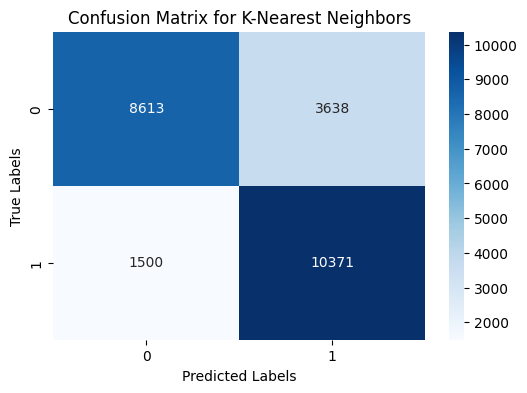

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix for K-Nearest Neighbors
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.show()


In [ ]:
# Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix for Decision Tree:")
print(cm_dt)

# Classification Report for Decision Tree
cr_dt = classification_report(y_test, y_pred_dt)
print("Classification Report for Decision Tree:")
print(cr_dt)


Confusion Matrix for Decision Tree:
[[9607 2644]
 [2426 9445]]
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79     12251
           1       0.78      0.80      0.79     11871

    accuracy                           0.79     24122
   macro avg       0.79      0.79      0.79     24122
weighted avg       0.79      0.79      0.79     24122



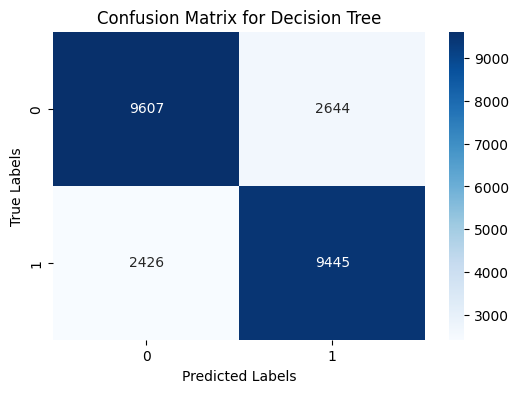

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix for Decision Tree
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


In [ ]:
# Deep Learning
cm_dl = confusion_matrix(y_test, y_pred_dl)
print("Confusion Matrix for Deep Learning:")
print(cm_dl)

# Classification Report for Deep Learning
cr_dl = classification_report(y_test, y_pred_dl)
print("Classification Report for Deep Learning:")
print(cr_dl)


Confusion Matrix for Deep Learning:
[[9581 2670]
 [2470 9401]]
Classification Report for Deep Learning:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79     12251
           1       0.78      0.79      0.79     11871

    accuracy                           0.79     24122
   macro avg       0.79      0.79      0.79     24122
weighted avg       0.79      0.79      0.79     24122



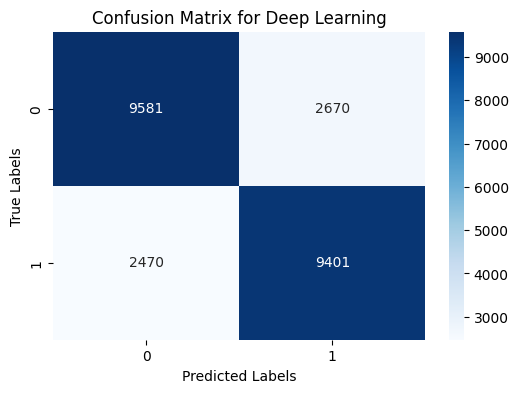

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix for Deep Learning
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Deep Learning')
plt.show()


In [ ]:
# Voting Ensemble (Hybrid Model)
cm_combined = confusion_matrix(y_test, y_pred_combined)
print("Confusion Matrix for Voting Ensemble (Hybrid Model):")
print(cm_combined)

# Classification Report for Voting Ensemble (Hybrid Model)
cr_combined = classification_report(y_test, y_pred_combined)
print("Classification Report for Voting Ensemble (Hybrid Model):")
print(cr_combined)


Confusion Matrix for Voting Ensemble (Hybrid Model):
[[ 9673  2578]
 [ 1610 10261]]
Classification Report for Voting Ensemble (Hybrid Model):
              precision    recall  f1-score   support

           0       0.86      0.79      0.82     12251
           1       0.80      0.86      0.83     11871

    accuracy                           0.83     24122
   macro avg       0.83      0.83      0.83     24122
weighted avg       0.83      0.83      0.83     24122



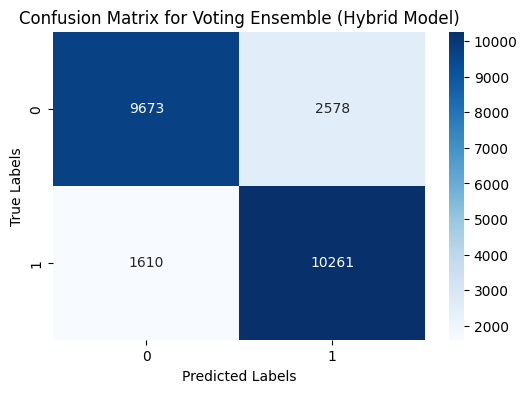

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix for Voting Ensemble (Hybrid Model)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Voting Ensemble (Hybrid Model)')
plt.show()


754/754 [==============================] - 1s 1ms/step


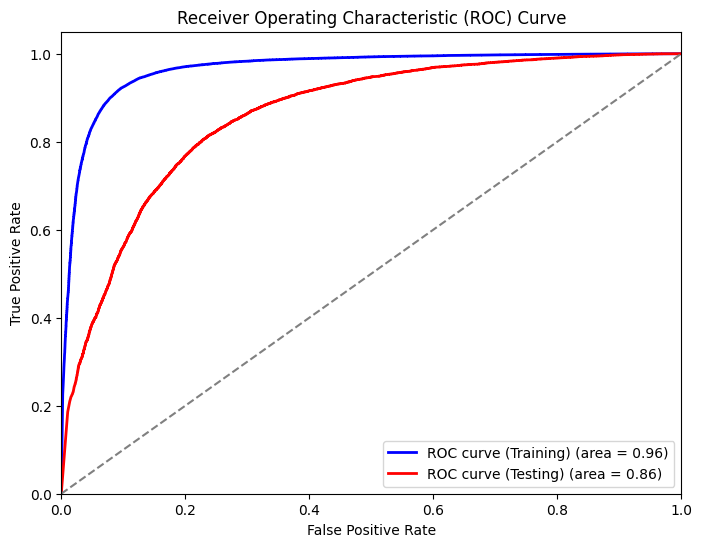

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Step 16: Plot ROC Curve for Deep Learning Model

# Training set
y_train_prob_dl = dl_model.predict(X_train_normalized).flatten()
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob_dl)
roc_auc_train = auc(fpr_train, tpr_train)

# Testing set
y_test_prob_dl = dl_model.predict(X_test_normalized).flatten()
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob_dl)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (Training) (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='ROC curve (Testing) (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


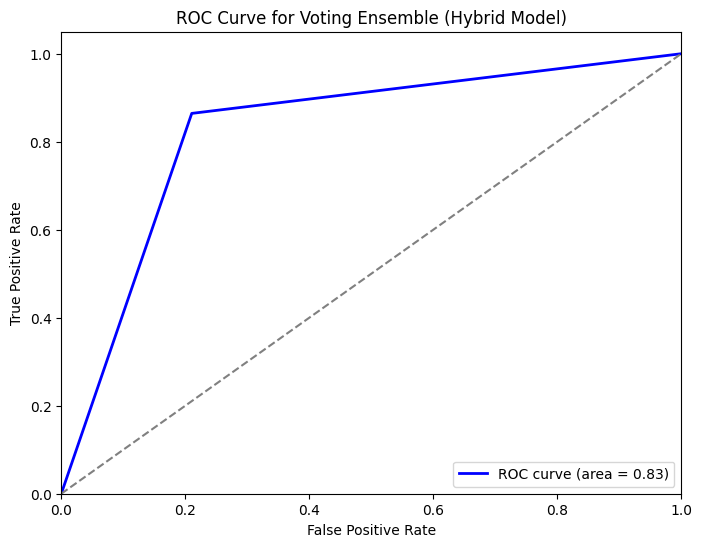

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute the false positive rate, true positive rate, and area under the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_combined)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Ensemble (Hybrid Model)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:

# Assuming you have already loaded the balanced data into a DataFrame called 'balanced_data'
# and the target class column is named 'default_ind'

# Step 1: Assign X and y values
X = balanced_data.drop(columns=['default_ind'])
y = balanced_data['default_ind']

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Normalize the data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Step 4: Build and Train K-Nearest Neighbors Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_normalized, y_train)
y_pred_knn = knn_model.predict(X_test_normalized)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy for K-Nearest Neighbors:", accuracy_knn)
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

# Step 5: Build and Train Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_normalized, y_train)
y_pred_dt = dt_model.predict(X_test_normalized)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy for Decision Tree:", accuracy_dt)
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

# Step 6: Build and Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normalized, y_train)
y_pred_rf = rf_model.predict(X_test_normalized)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy for Random Forest:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))



Accuracy for K-Nearest Neighbors: 0.7869994196169472
              precision    recall  f1-score   support

           0       0.85      0.70      0.77     12251
           1       0.74      0.87      0.80     11871

    accuracy                           0.79     24122
   macro avg       0.80      0.79      0.79     24122
weighted avg       0.80      0.79      0.79     24122

[[ 8613  3638]
 [ 1500 10371]]
Accuracy for Decision Tree: 0.7898184230163336
              precision    recall  f1-score   support

           0       0.80      0.78      0.79     12251
           1       0.78      0.80      0.79     11871

    accuracy                           0.79     24122
   macro avg       0.79      0.79      0.79     24122
weighted avg       0.79      0.79      0.79     24122

[[9607 2644]
 [2426 9445]]
Accuracy for Random Forest: 0.8583036232484869
              precision    recall  f1-score   support

           0       0.85      0.87      0.86     12251
           1       0.86      0.8

In [ ]:

# Step 8: Build and Train Logistic Regression Model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_normalized, y_train)
y_pred_lr = lr_model.predict(X_test_normalized)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy for Logistic Regression:", accuracy_lr)
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

Accuracy for Logistic Regression: 0.7518447889893044
              precision    recall  f1-score   support

           0       0.77      0.72      0.75     12251
           1       0.73      0.78      0.76     11871

    accuracy                           0.75     24122
   macro avg       0.75      0.75      0.75     24122
weighted avg       0.75      0.75      0.75     24122

[[8828 3423]
 [2563 9308]]


# **A hybrid model using Random Forest and Deep Learning, the Voting Ensemble technique.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have already loaded the balanced data into a DataFrame called 'balanced_data'
# and the target class column is named 'default_ind'

# Step 1: Assign X and y values
X = balanced_data.drop(columns=['default_ind'])
y = balanced_data['default_ind']

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Normalize the data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Step 4: Build the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 5: Train the Random Forest Model
rf_model.fit(X_train_normalized, y_train)

# Step 6: Build the Deep Learning Model
dl_model = Sequential()
dl_model.add(Dense(128, activation='relu', input_shape=(X_train_normalized.shape[1],)))
dl_model.add(Dense(64, activation='relu'))
dl_model.add(Dense(32, activation='relu'))
dl_model.add(Dense(1, activation='sigmoid'))

# Step 7: Compile the Deep Learning Model
dl_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 8: Train the Deep Learning Model
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
dl_model.fit(X_train_normalized, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Step 9: Make Predictions with Random Forest Model
y_pred_rf = rf_model.predict(X_test_normalized)

# Step 10: Make Predictions with Deep Learning Model
y_pred_dl_prob = dl_model.predict(X_test_normalized).flatten()
y_pred_dl = [1 if p >= 0.5 else 0 for p in y_pred_dl_prob]

# Step 11: Combine the Predictions using Voting Ensemble
y_pred_combined = (y_pred_rf + y_pred_dl) / 2
y_pred_combined = [1 if p >= 0.5 else 0 for p in y_pred_combined]

# Step 12: Evaluate the Hybrid Model
accuracy = accuracy_score(y_test, y_pred_combined)
print("Accuracy of the Hybrid Model (Random Forest + Deep Learning):", accuracy)
print(classification_report(y_test, y_pred_combined))
print(confusion_matrix(y_test, y_pred_combined))


Epoch 1/50
2413/2413 [==============================] - 7s 3ms/step - loss: 0.4948 - accuracy: 0.7591 - val_loss: 0.4763 - val_accuracy: 0.7700
Epoch 2/50
2413/2413 [==============================] - 7s 3ms/step - loss: 0.4725 - accuracy: 0.7741 - val_loss: 0.4608 - val_accuracy: 0.7800
Epoch 3/50
2413/2413 [==============================] - 6s 2ms/step - loss: 0.4573 - accuracy: 0.7835 - val_loss: 0.4503 - val_accuracy: 0.7853
Epoch 4/50
2413/2413 [==============================] - 10s 4ms/step - loss: 0.4427 - accuracy: 0.7900 - val_loss: 0.4426 - val_accuracy: 0.7912
Epoch 5/50
2413/2413 [==============================] - 9s 4ms/step - loss: 0.4300 - accuracy: 0.7967 - val_loss: 0.4416 - val_accuracy: 0.7897
Epoch 6/50
2413/2413 [==============================] - 10s 4ms/step - loss: 0.4204 - accuracy: 0.8013 - val_loss: 0.4360 - val_accuracy: 0.7913
Epoch 7/50
2413/2413 [==============================] - 6s 3ms/step - loss: 0.4118 - accuracy: 0.8058 - val_loss: 0.4269 - val_accurac

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

754/754 [==============================] - 1s 1ms/step


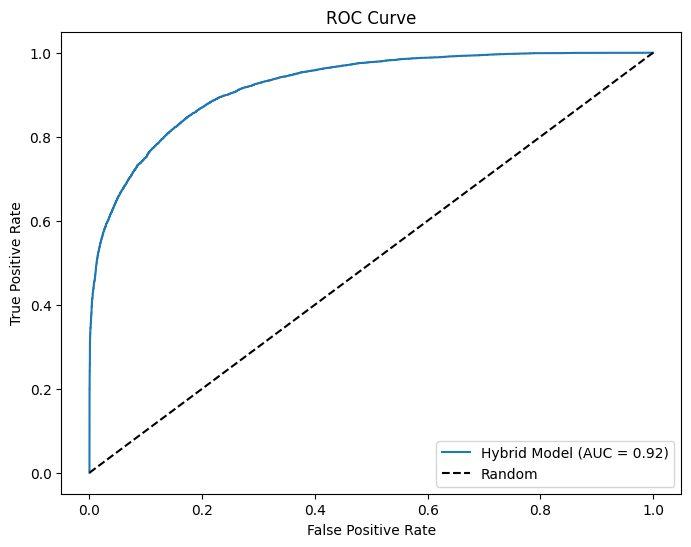

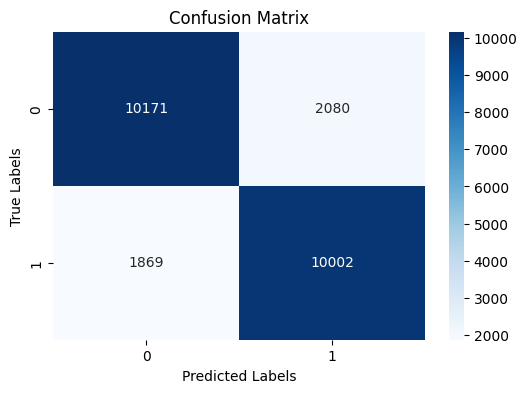

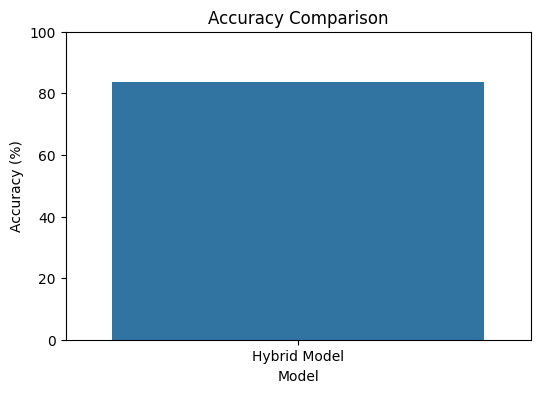

In [ ]:
# Step 9: Make Predictions with Random Forest Model
y_pred_rf_prob = rf_model.predict_proba(X_test_normalized)[:, 1]

# Step 10: Make Predictions with Deep Learning Model
y_pred_dl_prob = dl_model.predict(X_test_normalized).flatten()

# Step 11: Combine the Predictions using Voting Ensemble
y_pred_combined = (y_pred_rf_prob + y_pred_dl_prob) / 2

# Step 12: Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_combined)

# Step 13: Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_combined)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Hybrid Model (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Step 14: Get the accuracy of the Hybrid Model
y_pred_combined_binary = [1 if p >= 0.5 else 0 for p in y_pred_combined]
accuracy = accuracy_score(y_test, y_pred_combined_binary)

# Step 15: Plot the confusion matrix
cm_combined = confusion_matrix(y_test, y_pred_combined_binary)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Step 16: Plot the accuracy graph
models = ['Hybrid Model']
accuracies = [accuracy * 100]
plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracies)
plt.ylim(0, 100)
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison')
plt.show()